In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

model = XGBClassifier(eval_metric='logloss')

In [ ]:
# Load the dataset
df_GENPACT = pd.read_excel('/content/GENPACT.CSV.xlsx')
df_GENPACT

,Company Name,Company Location,Year,Annual Revenue (Million USD),Profit Margin (%),Number of Employees Before Layoff,Number of Employees After Layoff,Layoff Impact (Yes/No),Customer Satisfaction (%),Employee Retention Rate (%),Global Presence (Countries),Number of Laid Off,Date of Layoff,Market Share (%),Investment in Automation (Million USD),Number of Clients,Total Contracts
0,Genpact,"New York, USA",2000,350,8.0,4500,4500,No,78,70,15,0,05-05-20000,4.5,30,250,300
1,Genpact,"Bangalore, India",2001,420,9.0,5000,5000,No,80,72,18,0,2001-09-14 00:00:00,4.8,35,270,310
2,Genpact,"Dublin, Ireland",2002,550,10.5,6000,5800,Yes,83,75,20,200,2002-08-20 00:00:00,5.2,40,290,320
3,Genpact,"London, UK",2003,670,12.0,6800,6600,Yes,85,78,22,150,2003-11-15 00:00:00,5.5,45,310,330
4,Genpact,"Manila, Philippines",2004,800,13.0,7500,7400,No,87,80,25,0,2004-07-30 00:00:00,5.8,50,330,340
5,Genpact,"Chicago, USA",2005,1000,14.5,8200,8000,Yes,89,82,28,200,2005-03-10 00:00:00,6.0,55,350,350
6,Genpact,"Bangalore, India",2006,1200,15.0,9000,8800,No,91,84,30,0,2006-09-01 00:00:00,6.2,60,370,360
7,Genpact,"Hyderabad, India",2007,1450,16.0,9800,9600,No,92,85,33,0,2007-05-20 00:00:00,6.5,65,390,370
8,Genpact,Singapore,2008,1700,17.0,10200,9900,Yes,94,87,35,300,2008-12-10 00:00:00,7.0,70,410,380
9,Genpact,"London, UK",2009,2000,18.0,11000,10800,Yes,95,88,38,250,2009-07-25 00:00:00,7.2,75,430,390


In [ ]:
#  Add binary target - Layoff_Event
df_GENPACT['Layoff_Event'] = df_GENPACT['Number of Laid Off'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
# Simulate a few 'no-layoff' records for Genpact
no_layoff_genpact_data = {
    'Company Name': ['Genpact', 'Genpact', 'Genpact'],
    'Company Location': ['Chicago, USA', 'Hyderabad, India', 'Frankfurt, Germany'],
    'Year': [2005, 2011, 2018],
    'Annual Revenue (Million USD)': [950, 3100, 8000],
    'Profit Margin (%)': [14.0, 17.5, 21.0],
    'Number of Employees Before Layoff': [8200, 36000, 75000],
    'Number of Employees After Layoff': [8200, 36000, 75000],
    'Layoff Impact (Yes/No)': ['No', 'No', 'No'],
    'Customer Satisfaction (%)': [89, 91, 94],
    'Employee Retention Rate (%)': [82, 85, 88],
    'Global Presence (Countries)': [27, 33, 40],
    'Number of Laid Off': [0, 0, 0],
    'Date of Layoff': ['2005-08-12', '2011-03-22', '2018-10-05'],
    'Market Share (%)': [6.2, 8.5, 11.0],
    'Investment in Automation (Million USD)': [55, 100, 160],
    'Number of Clients': [360, 900, 1300],
    'Total Contracts': [380, 950, 1400]
}

# Create a DataFrame and concatenate with the original Genpact dataset
no_layoff_genpact_df = pd.DataFrame(no_layoff_genpact_data)
df_GENPACT = pd.concat([df_GENPACT, no_layoff_genpact_df], ignore_index=True)


In [ ]:
#  Feature selection for Genpact dataset
features = [
    'Year', 'Company Location', 'Annual Revenue (Million USD)', 'Profit Margin (%)',
    'Number of Employees Before Layoff', 'Market Share (%)',
    'Investment in Automation (Million USD)', 'Customer Satisfaction (%)', 'Date of Layoff'
]

X = df_GENPACT[features]

# Target variable: converting 'Layoff Impact (Yes/No)' to binary
y = df_GENPACT['Layoff Impact (Yes/No)'].apply(lambda x: 1 if x == 'Yes' else 0)



In [ ]:
# Convert 'Date of Layoff' to datetime format
X['Date of Layoff'] = pd.to_datetime(X['Date of Layoff'], errors='coerce')

# Optionally extract year, month, and day as separate features
X['Layoff Year'] = X['Date of Layoff'].dt.year
X['Layoff Month'] = X['Date of Layoff'].dt.month
X['Layoff Day'] = X['Date of Layoff'].dt.day

# Drop original 'Date of Layoff' column if not needed further
X = X.drop(columns=['Date of Layoff'])


<ipython-input-16-d9feab574de9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date of Layoff'] = pd.to_datetime(X['Date of Layoff'], errors='coerce')
<ipython-input-16-d9feab574de9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Layoff Year'] = X['Date of Layoff'].dt.year
<ipython-input-16-d9feab574de9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
# Add extracted date parts to the encoded features
X['Layoff_Year'] = X_original['Layoff_Year']
X['Layoff_Month'] = X_original['Layoff_Month']
X['Layoff_Day'] = X_original['Layoff_Day']




In [ ]:
# Fit LabelEncoders on combined unique values (for future consistency)
categorical_features = ['Company Location']  # Define categorical_features here
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    # Ensure all values are strings before fitting
    # Get unique values from BOTH X_scaled and future_data
    all_values = pd.concat([X_scaled[col].astype(str), future_data[col].astype(str)]).unique()
    le.fit(all_values)
    X_scaled[col] = le.transform(X_scaled[col].astype(str))  # Transform using string values
    future_data[col] = le.transform(future_data[col].astype(str))  # Transform using string values
    label_encoders[col] = le

In [ ]:
location = future_data.at[0, 'Company Location']
if location in label_encoders['Company Location'].classes_:
    future_data['Company Location'] = label_encoders['Company Location'].transform([location])
else:
    # Use a default known label (e.g., first label or "unknown")
    print("Unknown location. Using default label.")
    future_data['Company Location'] = label_encoders['Company Location'].transform(
        [label_encoders['Company Location'].classes_[0]]
    )




Unknown location. Using default label.


In [ ]:
import pandas as pd

# Placeholder for future_data aligned with Infosys feature structure
future_data = pd.DataFrame([{
    'Company Location': 'USA',
    'Year': 2025,
    'Sales (Million USD)': 600000.0,  # 600 Billion USD
    'Profit Margin (%)': 20.0,
    'Employees Before Layoff': 180000,
    'Market Share (%)': 12.0,
    'Investment in Automation (Million USD)': 275.0,
    'Client Satisfaction (%)': 94,
    'Layoff_Year': 2025,
    'Layoff_Month': 4,
    'Layoff_Day': 20
}])


In [ ]:
# Ensure all expected columns are in future_data
missing_cols = set(X_scaled.columns) - set(future_data.columns)
for col in missing_cols:
    future_data[col] = 0  # or a reasonable default

# Align column order
future_data = future_data[X_scaled.columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define categorical and numerical features
categorical_features = ['Company Location']
numerical_features = [
    'Sales (Million USD)', 'Profit Margin (%)', 'Employees Before Layoff',
    'Market Share (%)', 'Investment in Automation (Million USD)',
    'Client Satisfaction (%)', 'Layoff_Year', 'Layoff_Month', 'Layoff_Day'
]

# Create a copy to scale
X_scaled = X_original.copy()

# Fit LabelEncoders on combined unique values (for future consistency)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    # Ensure all values are strings before fitting
    all_values = pd.concat([X_scaled[col].astype(str), future_data[col].astype(str)]).unique()
    le.fit(all_values)
    X_scaled[col] = le.transform(X_scaled[col].astype(str))  # Transform using string values
    future_data[col] = le.transform(future_data[col].astype(str))  # Transform using string values
    label_encoders[col] = le

# Scale numeric features
scaler = StandardScaler()
X_scaled[numerical_features] = scaler.fit_transform(X_scaled[numerical_features])
future_data[numerical_features] = scaler.transform(future_data[numerical_features])

In [ ]:
# Ensure both are aligned before train-test split
X_scaled = X_scaled.reset_index(drop=True)
y = y.reset_index(drop=True)


In [ ]:
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)

X_scaled shape: (28, 11)
y shape: (31,)


In [ ]:


# Ensure both are aligned before train-test split
X_scaled = X_scaled.reset_index(drop=True)
y = y.reset_index(drop=True)

# Add this check to identify the shape mismatch
print(f"Shape of X_scaled: {X_scaled.shape}")
print(f"Shape of y: {y.shape}")

# If shapes are different, adjust them here.
# Example: If X_scaled has extra rows, remove them
X_scaled = X_scaled.iloc[:min(X_scaled.shape[0], y.shape[0])]

# Example: If y has extra rows, remove them
y = y.iloc[:min(X_scaled.shape[0], y.shape[0])]

print(f"Shape of X_scaled after adjustment: {X_scaled.shape}")
print(f"Shape of y after adjustment: {y.shape}")

Shape of X_scaled: (28, 11)
Shape of y: (31,)
Shape of X_scaled after adjustment: (28, 11)
Shape of y after adjustment: (28,)


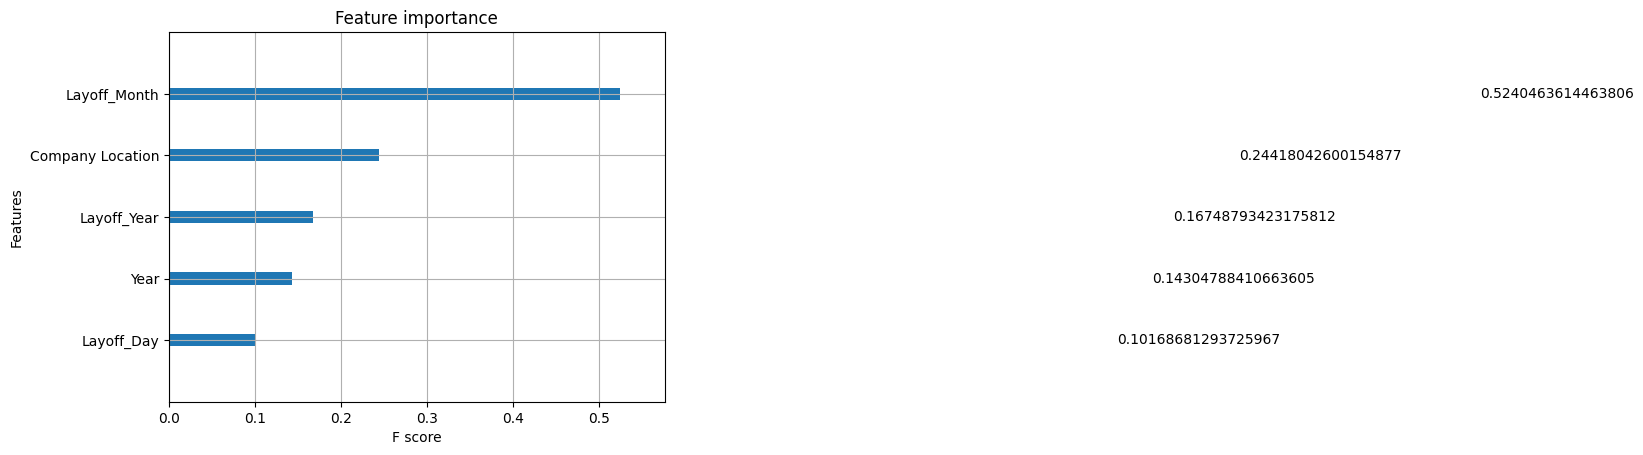

In [ ]:
# Step 8: Train classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train) # Make sure the model is trained

# Check if the model has learned anything by checking feature importances
importance = model.get_booster().get_score(importance_type='gain')

# If importance is empty, then the model hasn't learned anything useful.
if not importance:
    print("Model has not learned any features. Check data or model parameters.")
else:
    # If importance is not empty, proceed with plotting feature importance.
    from xgboost import plot_importance
    plot_importance(model, importance_type='gain')
    plt.show()

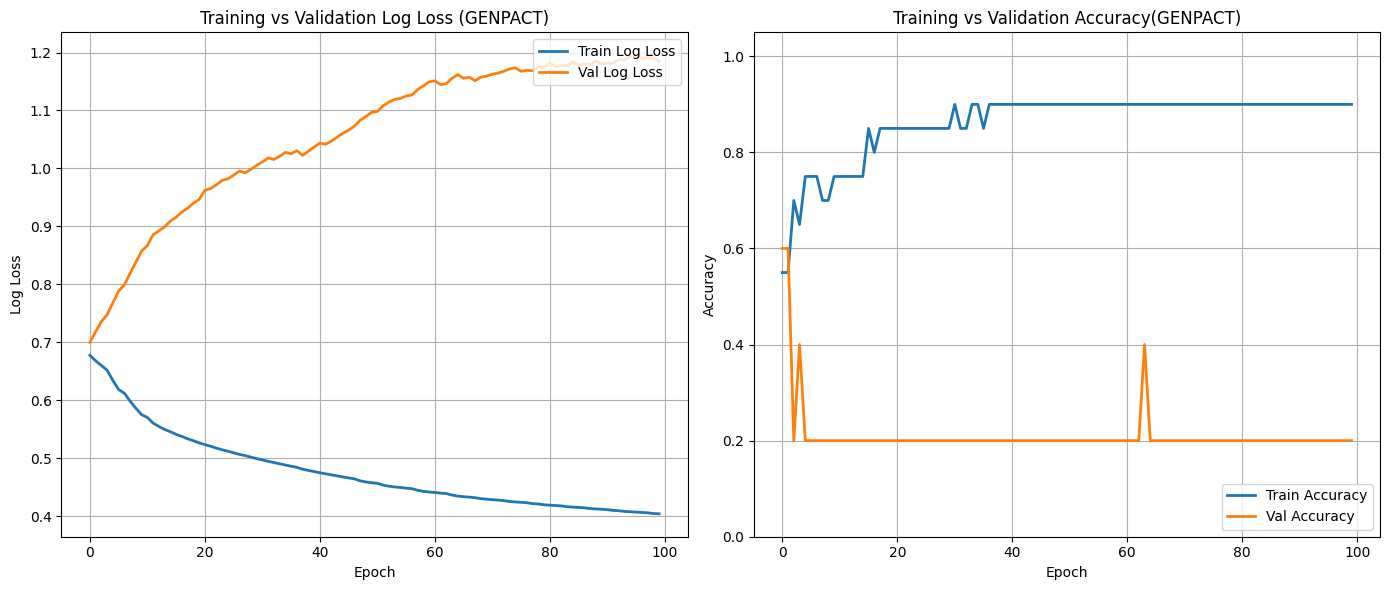

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# 1. Prepare the eval set
eval_set = [(X_train, y_train), (X_test, y_test)]

# 2. Instantiate with metrics to track
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],  # specify here
    n_estimators=100,
    learning_rate=0.1
)

# 3. Fit without passing eval_metric again
model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=False
)

# 4. Extract evaluation history
results = model.evals_result()

# 5. Number of boosting rounds (epochs)
epochs = len(results['validation_0']['logloss'])
x_axis = range(epochs)

# 6. Plot Log Loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss', lw=2)
plt.plot(x_axis, results['validation_1']['logloss'], label='Val Log Loss',   lw=2)
plt.title('Training vs Validation Log Loss (GENPACT)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend(loc='upper right')
plt.grid(True)

# 7. Plot Accuracy = 1 − error
train_acc = [1 - err for err in results['validation_0']['error']]
val_acc   = [1 - err for err in results['validation_1']['error']]

plt.subplot(1, 2, 2)
plt.plot(x_axis, train_acc, label='Train Accuracy', lw=2)
plt.plot(x_axis, val_acc,   label='Val Accuracy',   lw=2)
plt.title('Training vs Validation Accuracy(GENPACT)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Step 9: Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Confusion Matrix(GENPACT):\n", confusion_matrix(y_test, y_pred))

# Training predictions
y_train_pred = model.predict(X_train)

# Accuracy scores
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

print("\nTraining Classification Report(GENPACT):\n", classification_report(y_train, y_train_pred))

Confusion Matrix(GENPACT):
 [[1 2]
 [2 0]]
Training Accuracy: 90.00%
Test Accuracy: 20.00%

Training Classification Report(GENPACT):
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [ ]:
# Step 10: Predict future event (2025)
# Reorder columns in future_data to match the training data
future_data = future_data[[
    'Year', 'Company Location', 'Sales (Million USD)', 'Profit Margin (%)',
    'Employees Before Layoff', 'Market Share (%)',
    'Investment in Automation (Million USD)', 'Client Satisfaction (%)',
    'Layoff_Year', 'Layoff_Month', 'Layoff_Day'
]]

# Apply the label encoding to 'Company Location' in future_data
# Assuming label_encoders is accessible from previous code
# Instead of directly transforming, handle unknown values
location = future_data.at[0, 'Company Location']
if location in label_encoders['Company Location'].classes_:
    future_data['Company Location'] = label_encoders['Company Location'].transform([location])

    # Handle unknown location - here, we assign a default value
    # You could also choose to raise an error or impute a value

    # Assuming 0 is a safe default label, adjust if needed


future_pred = model.predict(future_data)
future_proba = model.predict_proba(future_data)
print("Layoff Prediction (GENPACT)")
print("Layoff Prediction for 2025 (GENPACT) :", "YES" if future_pred[0] == 1 else "NO")
print("LLayoff Probability (GENPACT) :", round(future_proba[0][1] * 100, 2), "%")

Layoff Prediction (GENPACT)
Layoff Prediction for 2025 (GENPACT) : NO
LLayoff Probability (GENPACT) : 35.86 %


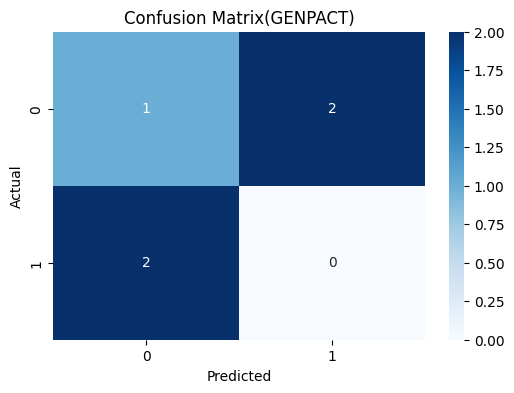

In [ ]:
# VALIDATION PLOTS
# Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix(GENPACT)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

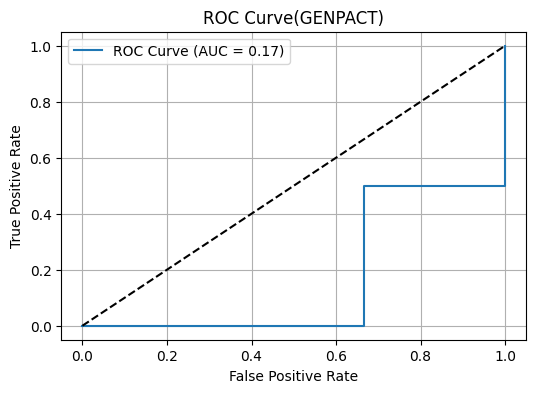

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(GENPACT)")
plt.legend()
plt.grid()
plt.show()

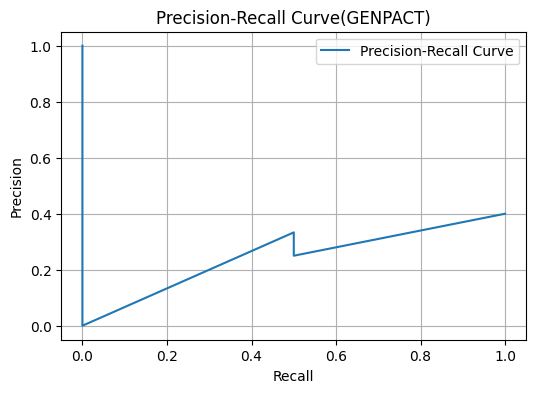

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve(GENPACT)")
plt.legend()
plt.grid()
plt.show()